In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

from anonymeter.evaluators import SinglingOutEvaluator
from anonymeter.evaluators import LinkabilityEvaluator
from anonymeter.evaluators import InferenceEvaluator

In [2]:
train = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Linkability_Attack_Generated_Data/High_Cor/High_Cor2/train")
control = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Linkability_Attack_Generated_Data/High_Cor/High_Cor2/control")

shigh_cor = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Linkability_Attack_Generated_Data/High_Cor/High_Cor2/shigh_cor")
shigh_cor09 = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Linkability_Attack_Generated_Data/High_Cor/High_Cor2/shigh_cor09")
synhigh_cor = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Linkability_Attack_Generated_Data/High_Cor/High_Cor2/synhigh_cor")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Linkability_Attack_Generated_Data/High_Cor/High_Cor2/train'

In [ ]:
base_path = "C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Linkability_Attack_Generated_Data/High_Cor/High_Cor2"

for i in range(99, 69, -1): 
    suffix = f"{i:03d}"  
    filename = f"shigh_cor{suffix}.csv"
    full_path = f"{base_path}/{filename}"
    
    try:
        
        globals()[f"shigh_cor{suffix}"] = pd.read_csv(full_path)
        print(f"Imported: shigh_cor{suffix}")
    except FileNotFoundError:
        print(f"File not found: {filename}")


Imported: shigh_cor099
Imported: shigh_cor098
Imported: shigh_cor097
Imported: shigh_cor096
Imported: shigh_cor095
Imported: shigh_cor094
Imported: shigh_cor093
Imported: shigh_cor092
Imported: shigh_cor091
Imported: shigh_cor090
Imported: shigh_cor089
Imported: shigh_cor088
Imported: shigh_cor087
Imported: shigh_cor086
Imported: shigh_cor085
Imported: shigh_cor084
Imported: shigh_cor083
Imported: shigh_cor082
Imported: shigh_cor081
Imported: shigh_cor080
Imported: shigh_cor079
Imported: shigh_cor078
Imported: shigh_cor077
Imported: shigh_cor076
Imported: shigh_cor075
Imported: shigh_cor074
Imported: shigh_cor073
Imported: shigh_cor072
Imported: shigh_cor071
Imported: shigh_cor070


# Linkability

In [4]:
aux_cols = [["age","zip_code","gender","education_level"],
            ["ethnicity","marital_status","job","income"]]

## synthesizer rankcor = 1

In [5]:
levaluator1 = LinkabilityEvaluator(ori=train, 
                                 syn=shigh_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=10)

levaluator1.evaluate(n_jobs=-2) 
print(levaluator1.risk())
res = levaluator1.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.7794778650823063, ci=(0.7661825804188496, 0.7927731497457631))
Successs rate of main attack: SuccessRate(value=0.7892222411676314, error=0.012630391538809333)
Successs rate of baseline attack: SuccessRate(value=0.002727562897448915, error=0.001543358850427869)
Successs rate of control attack: SuccessRate(value=0.0441877460009263, error=0.006350655955416949)


## synthpop

In [6]:
levaluator2 = LinkabilityEvaluator(ori=train, 
                                 syn=synhigh_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=10)

levaluator2.evaluate(n_jobs=-2) 
print(levaluator2.risk())
res = levaluator2.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.10523791150593875, ci=(0.09259173380564965, 0.11788408920622785))
Successs rate of main attack: SuccessRate(value=0.14209372055853553, error=0.01080930507259223)
Successs rate of baseline attack: SuccessRate(value=0.003227083175804064, error=0.0016908050193431565)
Successs rate of control attack: SuccessRate(value=0.04119062433079541, error=0.00613988992641314)


## synthesizer rankcor = [0.70,0.99]

In [7]:
linkability_results = []
suffixes = [f"{i:03d}" for i in range(99, 69, -1)]

for suffix in suffixes:  
    syn_varname = f"shigh_cor{suffix}"
    
    if syn_varname in globals():
        syn_data = globals()[syn_varname]
        
        print(f"Evaluating dataset: {syn_varname}")
        
        levaluator = LinkabilityEvaluator(
            ori=train,
            syn=syn_data,
            control=control,
            n_attacks=4000,
            aux_cols=aux_cols,
            n_neighbors=10
        )
        
        levaluator.evaluate(n_jobs=-2)
        
        res = levaluator.results()

        privacy_risk = levaluator.risk()
        print(f"Privacy risk for {syn_varname}: {privacy_risk}")
        
        linkability_results.append({
            "rankcor": int(suffix) / 100,  
            "attack_rate": res.attack_rate.value,  
            "baseline_rate": res.baseline_rate.value, 
            "control_rate": res.control_rate.value,   
            "risk": privacy_risk  
        })

df_link = pd.DataFrame(linkability_results)

df_link = df_link.sort_values(by="rankcor", ascending=False)

Evaluating dataset: shigh_cor099
Privacy risk for shigh_cor099: PrivacyRisk(value=0.7216028027710614, ci=(0.7072515649116694, 0.7359540406304533))
Evaluating dataset: shigh_cor098
Privacy risk for shigh_cor098: PrivacyRisk(value=0.6750331982122598, ci=(0.6600466907925819, 0.6900197056319377))
Evaluating dataset: shigh_cor097
Privacy risk for shigh_cor097: PrivacyRisk(value=0.5732585565048826, ci=(0.557195564369919, 0.5893215486398461))
Evaluating dataset: shigh_cor096
Privacy risk for shigh_cor096: PrivacyRisk(value=0.5546223506545005, ci=(0.5386114501505035, 0.5706332511584975))
Evaluating dataset: shigh_cor095
Privacy risk for shigh_cor095: PrivacyRisk(value=0.5245205312311135, ci=(0.5083511494908336, 0.5406899129713935))
Evaluating dataset: shigh_cor094
Privacy risk for shigh_cor094: PrivacyRisk(value=0.4658159807761202, ci=(0.44954211995044174, 0.48208984160179863))
Evaluating dataset: shigh_cor093
Privacy risk for shigh_cor093: PrivacyRisk(value=0.4605796327816781, ci=(0.444423927

In [8]:
df_link['risk_value'] = df_link['risk'].apply(lambda x: x.value)
df_link['risk_ci_lower'] = df_link['risk'].apply(lambda x: x.ci[0])
df_link['risk_ci_upper'] = df_link['risk'].apply(lambda x: x.ci[1])

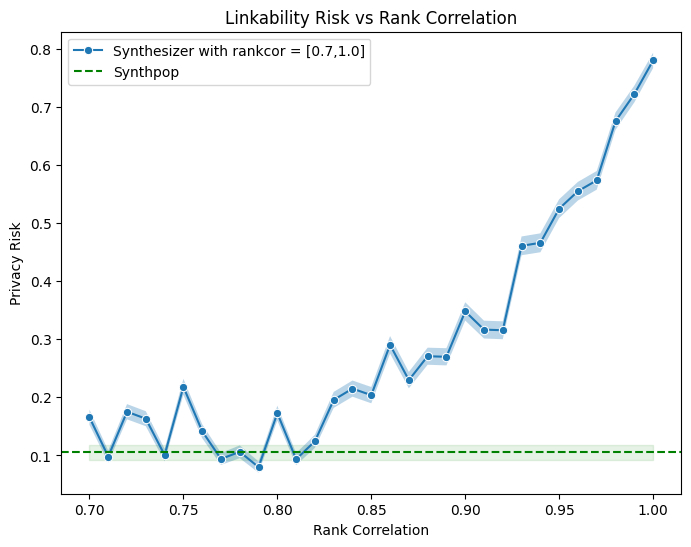

In [9]:
risk1 = levaluator1.risk()
risk2 = levaluator2.risk()

row1 = {
    'rankcor': 1.00,  
    'risk_value': risk1.value,
    'risk_ci_lower': risk1.ci[0],
    'risk_ci_upper': risk1.ci[1]
}

df_link_extended = pd.concat([df_link, pd.DataFrame([row1])], ignore_index=True)
df_link_extended = df_link_extended.sort_values(by='rankcor', ascending=False)

plt.figure(figsize=(8, 6))
sns.lineplot(
    x='rankcor',
    y='risk_value',
    data=df_link_extended,
    marker='o',
    label='Synthesizer with rankcor = [0.7,1.0]'
)

plt.fill_between(
    df_link_extended['rankcor'],
    df_link_extended['risk_ci_lower'],
    df_link_extended['risk_ci_upper'],
    alpha=0.3
)

plt.axhline(y=risk2.value, color='green', linestyle='--', label='Synthpop')
plt.fill_between(
    df_link_extended['rankcor'],
    risk2.ci[0],
    risk2.ci[1],
    color='green',
    alpha=0.1
)

plt.xlabel('Rank Correlation')
plt.ylabel('Privacy Risk')
plt.title('Linkability Risk vs Rank Correlation')
plt.legend()
plt.show()



# Inference

## synthesizer rankcor = 1

In [12]:
columns = train.columns
results1 = []

for secret in columns:
    
    aux_cols = [col for col in columns if col != secret]
    
    ievaluator1 = InferenceEvaluator(ori=train, 
                                   syn=shigh_cor, 
                                   control=control,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=2000)
    ievaluator1.evaluate(n_jobs=-2)
    results1.append((secret, ievaluator1.results()))

print(ievaluator1.risk())

PrivacyRisk(value=0.939507843620924, ci=(0.9281759803513715, 0.9508397068904765))


## synthpop

In [13]:
columns = train.columns
results3 = []

for secret in columns:
    
    aux_cols = [col for col in columns if col != secret]
    
    ievaluator3 = InferenceEvaluator(ori=train, 
                                   syn=synhigh_cor, 
                                   control=control,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=1000)
    ievaluator3.evaluate(n_jobs=-2)
    results3.append((secret, ievaluator3.results()))

print(ievaluator3.risk())

PrivacyRisk(value=0.08390776804790206, ci=(0.048997811580412276, 0.11881772451539185))


## synthesizer rankcor = [0.70,0.99]

In [ ]:
columns = train.columns

for i in range(99, 69, -1): 
    suffix = f"{i:03d}"  
    
    syn_data_varname = f"shigh_cor{suffix}"
    results_varname = f"results{suffix}"
    
    if syn_data_varname in globals():
        syn_data = globals()[syn_data_varname]
        results_list = []

        print(f"\nRunning inference attacks on: {syn_data_varname}")
        
        for secret in columns:
            aux_cols = [col for col in columns if col != secret]
            
            ievaluator = InferenceEvaluator(
                ori=train,
                syn=syn_data,
                control=control,
                aux_cols=aux_cols,
                secret=secret,
                n_attacks=2000
            )
            ievaluator.evaluate(n_jobs=-2)
            results_list.append((secret, ievaluator.results()))
        
        globals()[results_varname] = results_list

        print(f"Risk for {syn_data_varname}: {ievaluator.risk()}")
    else:
        print(f"{syn_data_varname} not found in globals.")



Running inference attacks on: shigh_cor099
Risk for shigh_cor099: PrivacyRisk(value=0.8533338935707245, ci=(0.8363904308803063, 0.8702773562611428))

Running inference attacks on: shigh_cor098
Risk for shigh_cor098: PrivacyRisk(value=0.8249089509520547, ci=(0.8066675744257537, 0.8431503274783558))

Running inference attacks on: shigh_cor097
Risk for shigh_cor097: PrivacyRisk(value=0.7524753872301236, ci=(0.7313560377220593, 0.773594736738188))

Running inference attacks on: shigh_cor096
Risk for shigh_cor096: PrivacyRisk(value=0.6712242265649289, ci=(0.6480925978115264, 0.6943558553183313))

Running inference attacks on: shigh_cor095
Risk for shigh_cor095: PrivacyRisk(value=0.6403697514135174, ci=(0.6164708897047864, 0.6642686131222484))

Running inference attacks on: shigh_cor094
Risk for shigh_cor094: PrivacyRisk(value=0.5729894916373683, ci=(0.5479947917590816, 0.5979841915156551))

Running inference attacks on: shigh_cor093
Risk for shigh_cor093: PrivacyRisk(value=0.51885392347187

C:\Users\maria\AppData\Local\Temp\ipykernel_38144\3390154485.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_38144\3390154485.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_38144\3390154485.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_38144\3390154485.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='righ

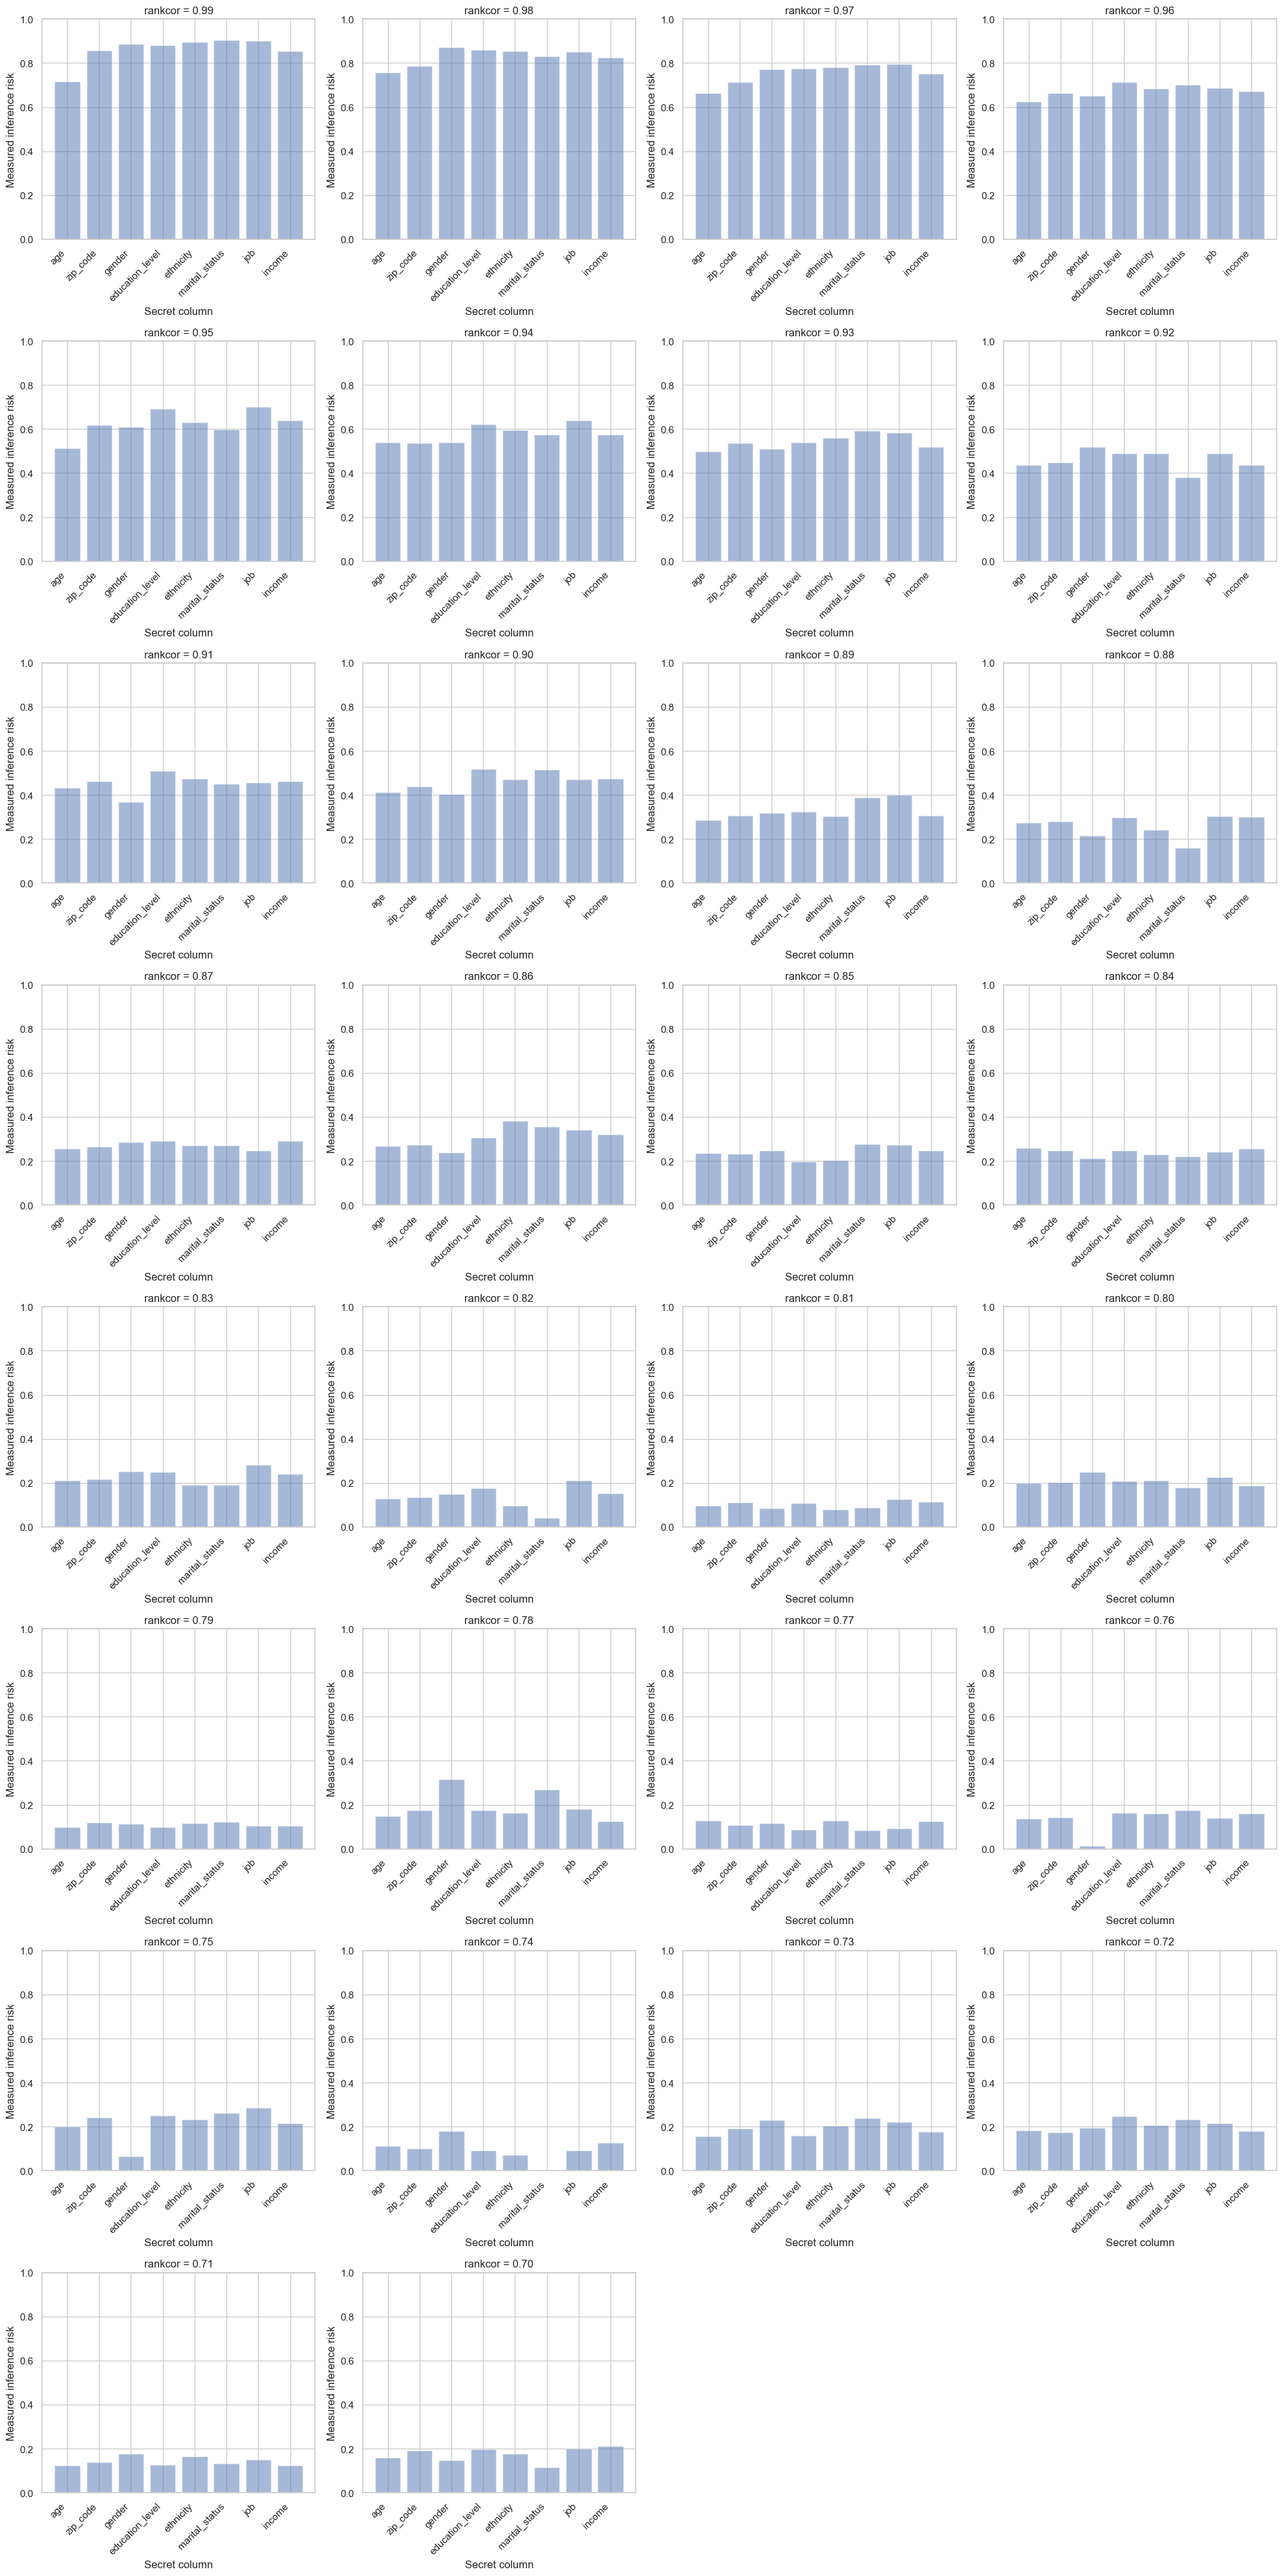

In [15]:
suffixes = [f"{i:03d}" for i in range(99, 69, -1)]
num_plots = len(suffixes)

cols = 4
rows = math.ceil(num_plots / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  

for idx, suffix in enumerate(suffixes):
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        risks = [res[1].risk().value for res in results]
        secrets = [res[0] for res in results]

        ax = axes[idx]
        ax.bar(x=secrets, height=risks, alpha=0.5, ecolor='black', capsize=10)
        ax.set_xticklabels(secrets, rotation=45, ha='right')
        ax.set_ylabel("Measured inference risk")
        ax.set_xlabel("Secret column")
        ax.set_ylim(0, 1)
        ax.set_title(f"rankcor = 0.{suffix[-2:]}")
    else:
        axes[idx].axis("off") 
        
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


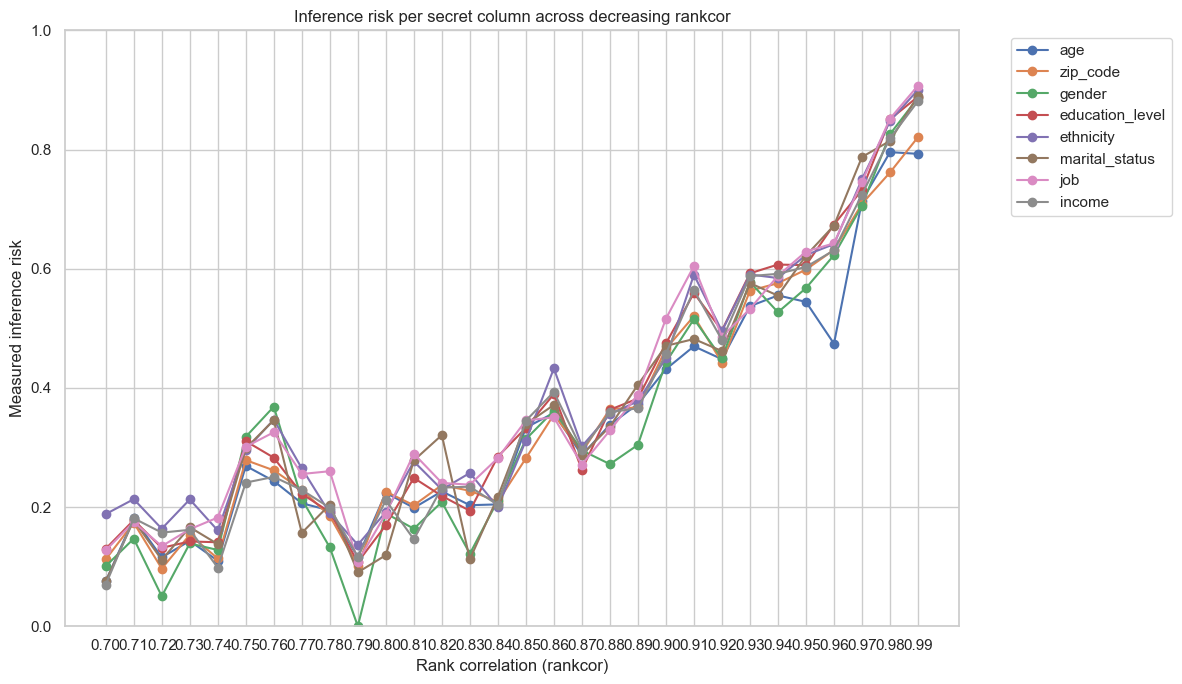

In [23]:
suffixes = [f"{i:03d}" for i in range(99, 69, -1)]
rankcors = [int(suffix) / 100 for suffix in suffixes]

secret_columns = [res[0] for res in globals()[f"results{suffixes[0]}"]]

risk_by_secret = {secret: [] for secret in secret_columns}

for suffix in suffixes:
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        for secret, result in results:
            risk_by_secret[secret].append(result.risk().value)
    else:
        for secret in secret_columns:
            risk_by_secret[secret].append(None)  

plt.figure(figsize=(12, 7))

for secret, risks in risk_by_secret.items():
    plt.plot(rankcors, risks, marker='o', label=secret)

plt.xlabel("Rank correlation (rankcor)")
plt.ylabel("Measured inference risk")
plt.title("Inference risk per secret column across decreasing rankcor")
plt.xticks(rankcors)
plt.ylim(0, 1)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


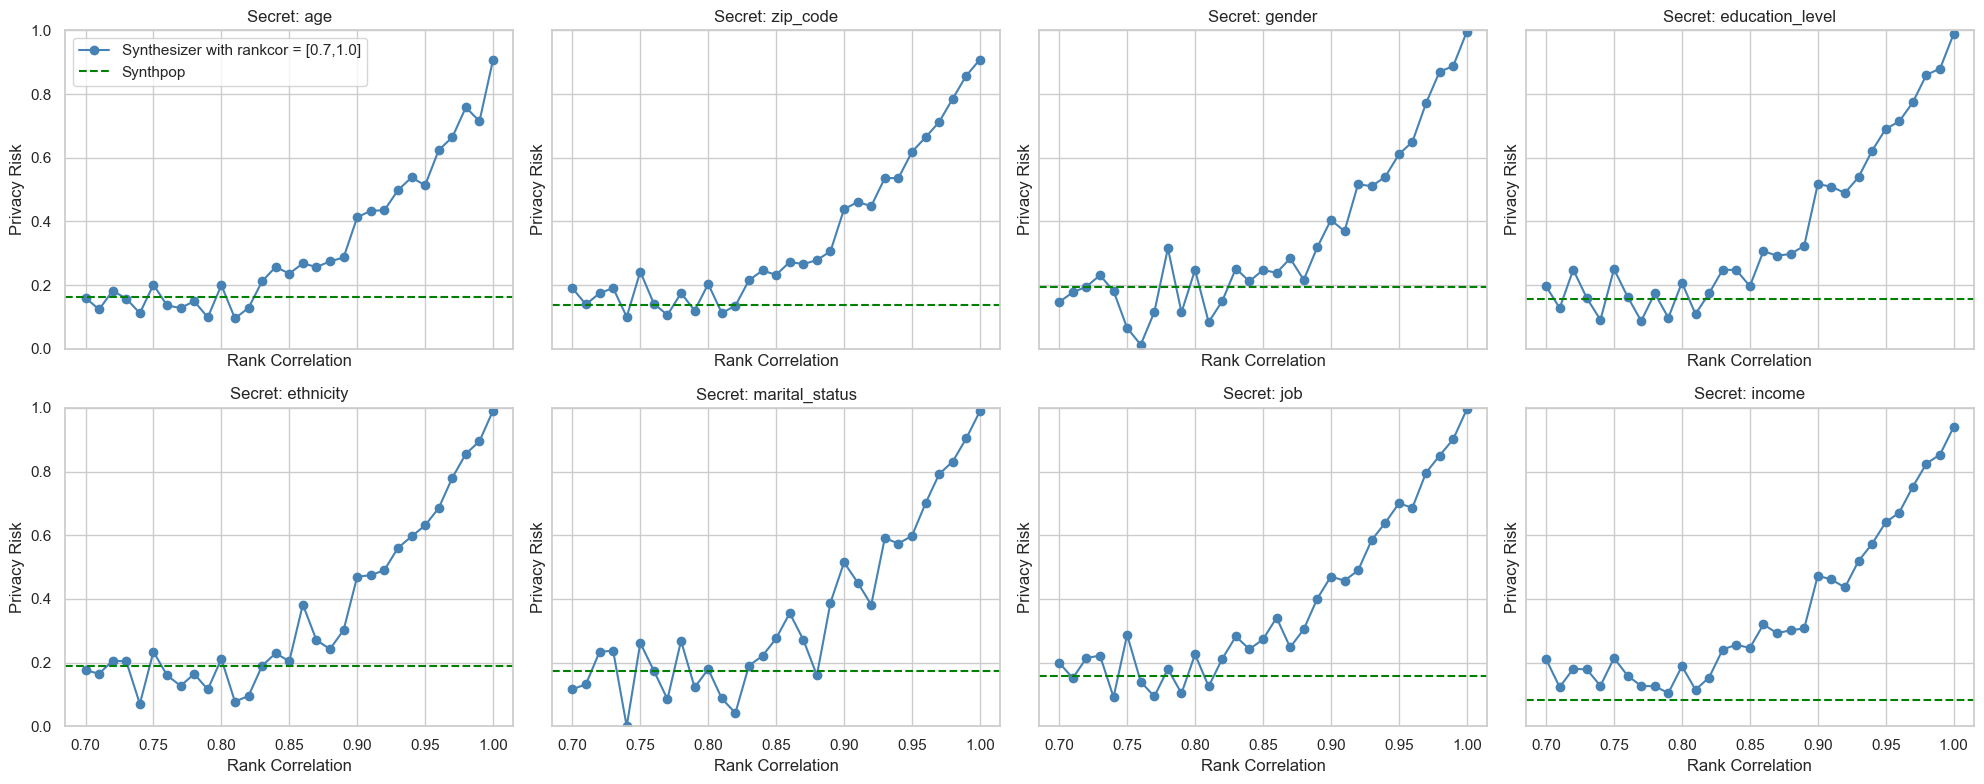

In [ ]:
rankcors = [int(suffix) / 100 for suffix in suffixes]
rankcors_full = [1.00] + rankcors  

risk1_dict = {secret: result.risk().value for secret, result in results1}
risk3_dict = {secret: result.risk().value for secret, result in results3}

risk_by_secret_full = {}

for secret in secret_columns:
    risk_vals = risk_by_secret[secret]
    
    if secret in risk1_dict:
        risk_vals_full = [risk1_dict[secret]] + risk_vals
    else:
        risk_vals_full = [None] + risk_vals
    
    risk_by_secret_full[secret] = risk_vals_full

n = len(secret_columns)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for idx, secret in enumerate(secret_columns):
    ax = axes[idx]
    
    ax.plot(rankcors_full, risk_by_secret_full[secret], marker='o', color='steelblue', label='Synthesizer with rankcor = [0.7,1.0]')

    if secret in risk3_dict:
        ax.axhline(y=risk3_dict[secret], color='green', linestyle='--', label='Synthpop')
    
    ax.set_title(f"Secret: {secret}")
    ax.set_ylim(0, 1)
    ax.set_xlabel("Rank Correlation")
    ax.set_ylabel("Privacy Risk")
    ax.grid(True)

    if idx == 0:
        ax.legend()

for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

